# 1. Importing and Browsing Data 

Performed by: Kendall and Andrew

In [1]:
cd data

C:\Users\Hendricks\Documents\Flatiron\project_1\dsc-phase-1-project-v3\data


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)
aviation = pd.read_csv('Aviation_Data.csv')

C:\Users\Hendricks\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
aviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [4]:
aviation.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


# 2. Cleaning Data

Performed by: Kendall and Andrew

1. Drop duplicates based on event ID: 1390 entries.
2. Standardized weather conditions (upper/lower casing)
3. Standardized make names (upper/lower casing)
4. Drop null values for event date: 1 entry.
4. Created Year column.

In [5]:
#dropping dupliates
duplicates = aviation[aviation.duplicated()]
print(len(duplicates))
duplicates.head(30)
aviation = aviation.drop_duplicates(subset='Event.Id')

1390


In [6]:
#dropping event ID N/A
aviation.dropna(subset=['Event.Id'], inplace=True)

In [7]:
#standardizing weather conditions
aviation['Weather.Condition'] = aviation['Weather.Condition'].replace('Unk', 'UNK')

In [8]:
aviation['Engine.Type'] = aviation['Engine.Type'].replace('NONE', 'None')

In [9]:
#standardizing make names
aviation['Make'] = aviation['Make'].apply(lambda x: str(x).title())
aviation['Make'] = aviation['Make'].replace('PIPER', 'Piper')
aviation['Make'] = aviation['Make'].replace('CESSNA', 'Cessna')
aviation['Make'] = aviation['Make'].replace('BEECH', 'Beech')
aviation['Make'] = aviation['Make'].replace('BELL', 'Bell')

In [10]:
aviation['Make'].value_counts()

Cessna                26839
Piper                 14744
Beech                  5332
Bell                   2706
Boeing                 2652
                      ...  
Stol Aircraft Corp        1
Corey                     1
Oliver Joseph             1
Wim J Huisman             1
Fuller Van L              1
Name: Make, Length: 7553, dtype: int64

In [11]:
#dropping nans for event date
aviation.dropna(subset=['Event.Date'], inplace=True)

In [12]:
#creating year column
aviation['Year'] = aviation['Event.Date'].astype(str).str[:4]

# 3A. ENGINE COUNT & TYPE - Trend Exploration

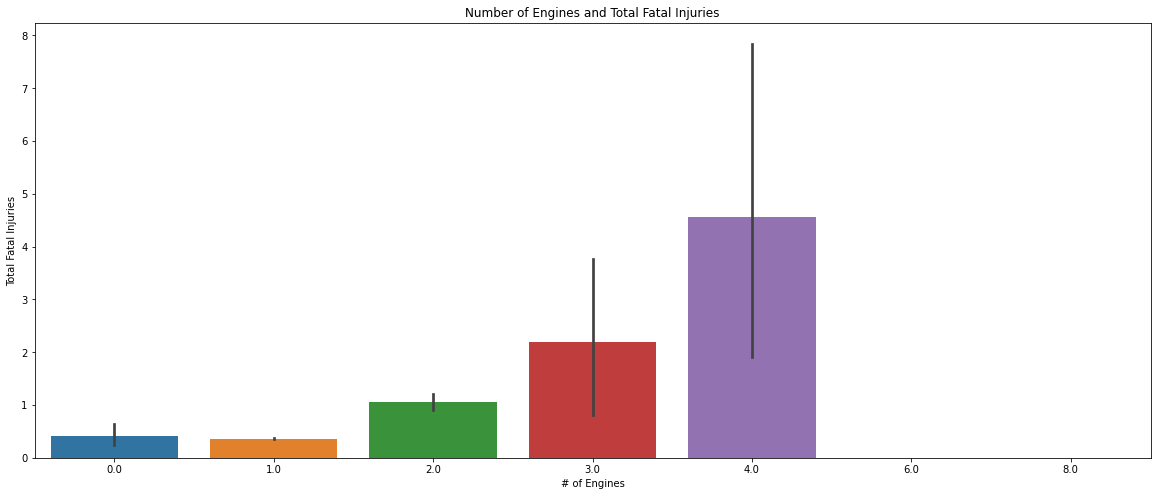

In [13]:
#plot of engine count and fatal injuries
fig, ax = plt.subplots(figsize=(20,8))

sns.barplot(x=aviation['Number.of.Engines'], y=aviation['Total.Fatal.Injuries'])

ax.set_title('Number of Engines and Total Fatal Injuries')
ax.set_xlabel('# of Engines')
ax.set_ylabel('Total Fatal Injuries');

In [14]:
#sum of injuries for engine count
engine_count = aviation.groupby('Number.of.Engines').sum()
engine_count

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Number.of.Engines,,,,
0.0,402.0,443.0,476.0,3018.0
1.0,21627.0,13818.0,17592.0,71816.0
2.0,10048.0,3385.0,4416.0,183081.0
3.0,861.0,316.0,1141.0,46148.0
4.0,1651.0,231.0,506.0,37622.0
6.0,0.0,0.0,0.0,0.0
8.0,0.0,21.0,3.0,11.0


In [15]:
#means of injueries for engine count
aviation.groupby('Number.of.Engines').mean()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Number.of.Engines,,,,
0.0,0.420502,0.436884,0.485714,2.768807
1.0,0.359444,0.232056,0.291925,1.109916
2.0,1.052918,0.361839,0.474227,17.838936
3.0,2.190840,0.784119,2.881313,104.171558
4.0,4.560773,0.634615,1.390110,93.354839
6.0,0.000000,0.000000,0.000000,0.000000
8.0,0.000000,7.000000,1.000000,3.666667


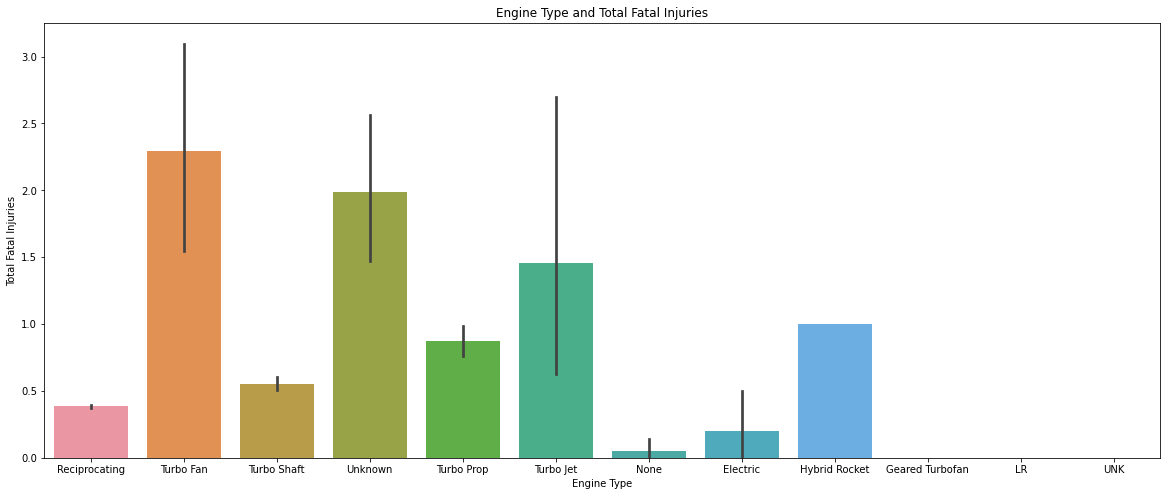

In [16]:
#plot of engine type and total fatal injuries
fig, ax = plt.subplots(figsize=(20,8))

sns.barplot(x=aviation['Engine.Type'], y=aviation['Total.Fatal.Injuries'])

ax.set_title('Engine Type and Total Fatal Injuries')
ax.set_xlabel('Engine Type')
ax.set_ylabel('Total Fatal Injuries');

In [17]:
engine_count['Total Passengers'] = engine_count['Total.Fatal.Injuries'] + engine_count['Total.Serious.Injuries'] + engine_count['Total.Minor.Injuries'] + engine_count['Total.Uninjured']

# 3B: ENGINE COUNT - Ratio of Uninjured to All Passengers 

Performed by: Kendall 

In [18]:
engine_count['Ratio Uninjured'] = engine_count['Total.Uninjured'] / engine_count['Total Passengers']
engine_count

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total Passengers,Ratio Uninjured
Number.of.Engines,,,,,,
0.0,402.0,443.0,476.0,3018.0,4339.0,0.695552
1.0,21627.0,13818.0,17592.0,71816.0,124853.0,0.575204
2.0,10048.0,3385.0,4416.0,183081.0,200930.0,0.911168
3.0,861.0,316.0,1141.0,46148.0,48466.0,0.952173
4.0,1651.0,231.0,506.0,37622.0,40010.0,0.940315
6.0,0.0,0.0,0.0,0.0,0.0,NaN
8.0,0.0,21.0,3.0,11.0,35.0,0.314286


In [19]:
engine_count['Ratio Uninjured'] = engine_count['Ratio Uninjured']*100 

<ipython-input-20-c8a47c756f99>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_value);


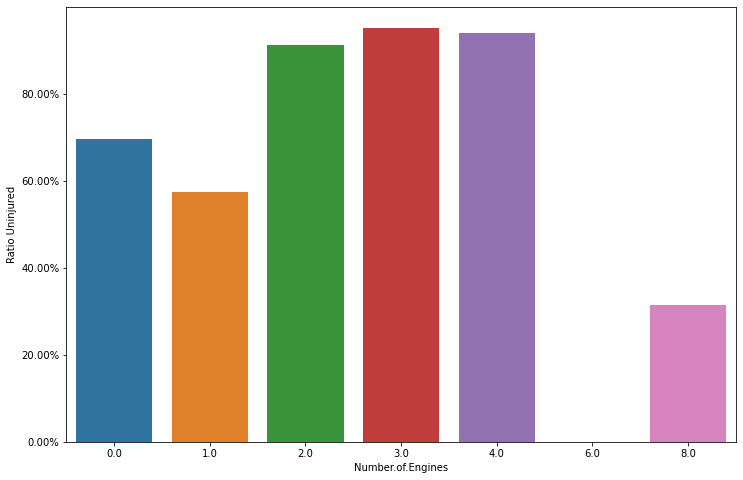

In [20]:
fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(x=engine_count.index, y=engine_count['Ratio Uninjured'])
y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value);

*94-95% of passengers in accidents of planes with 3 and 4 engines were uninjured.

# 3C: ENGINE TYPE - Ratio of Uninjured to All Passengers 


Performed by: Kendall

In [21]:
#sums of engine types and total injuries
aviation.groupby('Engine.Type').sum()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Engine.Type,,,,,
Electric,24.0,2.0,1.0,0.0,7.0
Geared Turbofan,22.0,0.0,0.0,0.0,121.0
Hybrid Rocket,1.0,1.0,0.0,1.0,0.0
LR,16.0,0.0,21.0,3.0,11.0
None,11.0,1.0,12.0,8.0,92.0
Reciprocating,74452.0,23126.0,13366.0,17157.0,72943.0
Turbo Fan,5344.0,4419.0,1812.0,3279.0,194409.0
Turbo Jet,1446.0,841.0,234.0,363.0,32504.0
Turbo Prop,5126.0,2448.0,671.0,885.0,14836.0


In [22]:
#means of engine type and number of injuries
aviation.groupby('Engine.Type').mean()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Engine.Type,,,,,
Electric,3.000000,0.200000,0.100000,0.000000,0.700000
Geared Turbofan,2.000000,0.000000,0.000000,0.000000,10.083333
Hybrid Rocket,1.000000,1.000000,0.000000,1.000000,0.000000
LR,8.000000,0.000000,10.500000,1.500000,5.500000
None,0.647059,0.047619,0.571429,0.380952,4.380952
Reciprocating,1.088798,0.383732,0.224563,0.285213,1.128520
Turbo Fan,2.337708,2.294393,0.908726,1.675524,83.688765
Turbo Jet,2.139053,1.460069,0.406957,0.640212,50.083205
Turbo Prop,1.572875,0.869936,0.248151,0.323111,4.851537


In [23]:
engine_types = aviation.groupby('Engine.Type').sum()

In [24]:
#creating a total passengers column and then a ratio of total uninjured to total passengers
engine_types['Total Passengers'] = engine_types['Total.Fatal.Injuries'] + engine_types['Total.Serious.Injuries'] + engine_types['Total.Minor.Injuries'] + engine_types['Total.Uninjured']
engine_types['Ratio Uninjured'] = engine_types['Total.Uninjured'] / engine_types['Total Passengers']

In [25]:
engine_types

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total Passengers,Ratio Uninjured
Engine.Type,,,,,,,
Electric,24.0,2.0,1.0,0.0,7.0,10.0,0.700000
Geared Turbofan,22.0,0.0,0.0,0.0,121.0,121.0,1.000000
Hybrid Rocket,1.0,1.0,0.0,1.0,0.0,2.0,0.000000
LR,16.0,0.0,21.0,3.0,11.0,35.0,0.314286
None,11.0,1.0,12.0,8.0,92.0,113.0,0.814159
Reciprocating,74452.0,23126.0,13366.0,17157.0,72943.0,126592.0,0.576205
Turbo Fan,5344.0,4419.0,1812.0,3279.0,194409.0,203919.0,0.953364
Turbo Jet,1446.0,841.0,234.0,363.0,32504.0,33942.0,0.957634
Turbo Prop,5126.0,2448.0,671.0,885.0,14836.0,18840.0,0.787473


In [26]:
engine_types['Ratio Uninjured'] = engine_types['Ratio Uninjured']*100 

In [27]:
#making the column into a percentage format
#engine_types['Ratio Uninjured'] = engine_types['Ratio Uninjured']*100 
#engine_types['Ratio Uninjured'] = engine_types['Ratio Uninjured'].map('{:.2%}'.format)

<ipython-input-28-48da2f0f6469>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_value);


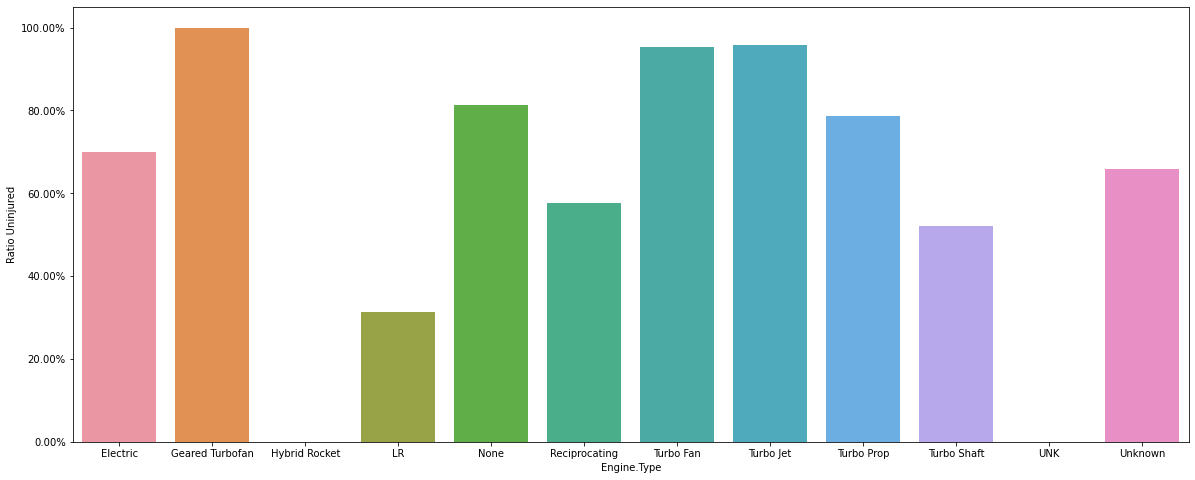

In [28]:
fig, ax = plt.subplots(figsize=(20,8))

sns.barplot(x=engine_types.index, y=engine_types['Ratio Uninjured'])
y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value);

*Over 95% of passengers on Turbo Fan and Turbo Jet planes are uninjured. 

In [29]:
make['Total Passengers'] = make['Total.Fatal.Injuries'] + make['Total.Serious.Injuries'] + make['Total.Minor.Injuries'] + make['Total.Uninjured']

NameError: name 'make' is not defined

In [30]:
make

NameError: name 'make' is not defined

# 4. AIRCRAFT DAMAGE - Exploring Trends

Performed by: Kendall

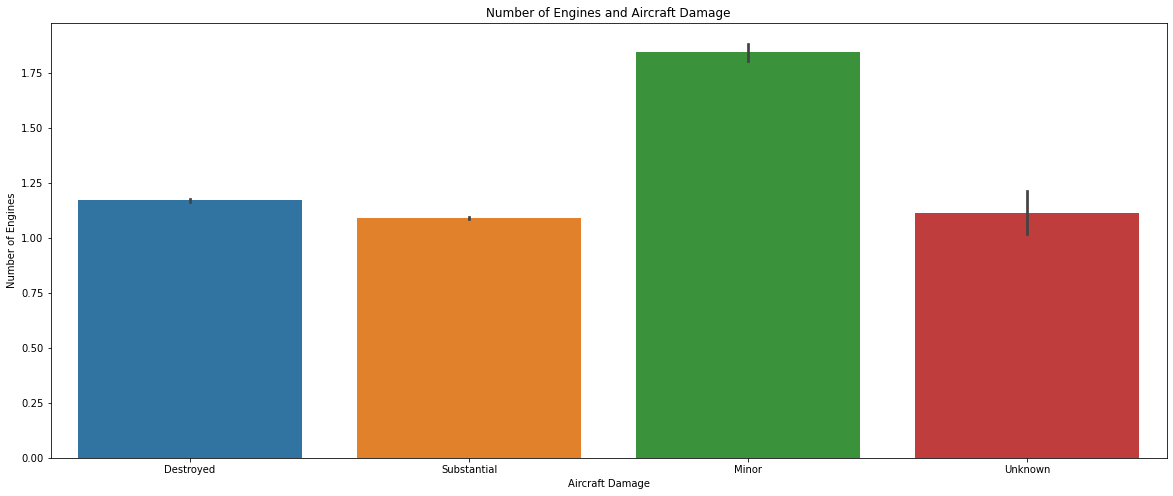

In [31]:
fig, ax = plt.subplots(figsize=(20,8))

sns.barplot(x=aviation['Aircraft.damage'], y=aviation['Number.of.Engines'])

ax.set_title('Number of Engines and Aircraft Damage')
ax.set_xlabel('Aircraft Damage')
ax.set_ylabel('Number of Engines');

In [ ]:
aviation.groupby('Aircraft.damage').sum()

In [ ]:
aviation.groupby('Aircraft.damage').mean()

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))

sns.barplot(x=aviation['Aircraft.damage'], y=aviation['Total.Fatal.Injuries'])

ax.set_title('Aircraft Damage and Total Fatal Injuries')
ax.set_xlabel('Aircraft Damage')
ax.set_ylabel('Total Fatal Injuries');

In [ ]:
aviation.groupby(['Aircraft.damage','Number.of.Engines']).mean()

In [ ]:
aviation.groupby(['Number.of.Engines','Engine.Type']).mean()

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
aviation.groupby(['Number.of.Engines','Purpose.of.flight']).mean()

In [ ]:
aviation.groupby(['Year']).mean()

In [ ]:
aviation['Aircraft.damage'].value_counts()

In [ ]:
aviation['Aircraft.damage'].value_counts()

# 5A. Creating an "Aviation Severe" DataFrame 

Performed by: Kendall and Andrew

This includes accidents with at least one fatality, at least one serious injury, or a completely destroyed aircraft.

In [ ]:
aviation_severe = aviation.loc[
    (aviation['Total.Fatal.Injuries'] >= 1) | 
    (aviation['Total.Serious.Injuries'] >= 1) |
    (aviation['Aircraft.damage'] == 'Destroyed')
]

In [ ]:
aviation_severe.head(50)

In [ ]:
aviation_severe.describe()

In [ ]:
aviation_severe.shape

In [ ]:
aviation.info()

In [ ]:
aviation_severe.groupby(['Total.Fatal.Injuries']).sum()

In [ ]:
aviation_severe.groupby(['Total.Fatal.Injuries']).mean()

In [ ]:
aviation_severe['Year'] = aviation_severe['Year'].astype(int)

# 5B. Creating a "Recent Aviation Severe" (Since 2000) DataFrame 

Performed by: Kendall and Andrew

This includes accidents *since 2000* with at least one fatality, at least one serious injury, or a completely destroyed aircraft.

In [ ]:
recent_aviation_severe = aviation_severe.loc[aviation['Year'] >= 2000]

In [ ]:
recent_aviation_severe['Engine.Type'].value_counts()

In [ ]:
recent_aviation_severe['Number.of.Engines'].value_counts()

In [ ]:
recent_aviation_severe['Purpose.of.flight'].value_counts()

In [ ]:
recent_aviation_severe['Make'].value_counts()

In [ ]:
recent_aviation_severe['Purpose.of.flight'].value_counts()

# 6A. Aviation Severe - ENGINE COUNT - Ratio of Uninjured to All Passengers

Performed by Kendall

In [ ]:
aviation_severe_engine_counts = aviation_severe.groupby(['Number.of.Engines']).mean()

In [ ]:
aviation_severe_engine_counts['Total Passengers'] = aviation_severe_engine_counts['Total.Fatal.Injuries'] + aviation_severe_engine_counts['Total.Serious.Injuries'] + aviation_severe_engine_counts['Total.Minor.Injuries'] + aviation_severe_engine_counts['Total.Uninjured']

In [ ]:
aviation_severe_engine_counts

In [ ]:
aviation_severe_engine_counts['Ratio of Uninjured'] = aviation_severe_engine_counts['Total.Uninjured'] / aviation_severe_engine_counts['Total Passengers'] 

In [ ]:
aviation_severe_engine_counts

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(x=aviation_severe_engine_counts.index, y=aviation_severe_engine_counts['Ratio of Uninjured'])
y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value);

# 6B. Aviation Severe - ENGINE TYPE - Ratio of Uninjured to All Passengers

In [ ]:
aviation_severe_engine_types = recent_aviation_severe.groupby(['Engine.Type']).mean()

In [ ]:
aviation_severe_engine_types['Total Passengers'] = aviation_severe_engine_types['Total.Fatal.Injuries'] + aviation_severe_engine_types['Total.Serious.Injuries'] + aviation_severe_engine_types['Total.Minor.Injuries'] + aviation_severe_engine_types['Total.Uninjured']

In [ ]:
aviation_severe_engine_types

In [ ]:
aviation_severe_engine_types['Ratio of Uninjured'] = aviation_severe_engine_types['Total.Uninjured'] / aviation_severe_engine_types['Total Passengers'] 

In [ ]:
aviation_severe_engine_types

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(x=aviation_severe_engine_types.index, y=aviation_severe_engine_types['Ratio of Uninjured'])
y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value);

# 6C. Exploring Engine Counts for Turbo Fan and Turbo Jet Planes

Performed by: Kendall

In [ ]:
turbo_jets = aviation.loc[aviation['Engine.Type'] == 'Turbo Jet']

In [ ]:
turbo_jets['Number.of.Engines'].value_counts()

In [ ]:
turbo_fan = aviation.loc[aviation['Engine.Type'] == 'Turbo Fan']

In [ ]:
turbo_fan['Number.of.Engines'].value_counts()

In [ ]:
turbo_jets['Purpose.of.flight'].value_counts()

In [ ]:
turbo_fan['Purpose.of.flight'].value_counts()

# 6D. Creating Separate 1-2 Engines and Greater than 3 Engines DataFrames

Performed by: Kendall and Andrew

In [ ]:
one_and_two_engines = aviation.loc[(aviation['Number.of.Engines'] < 3) & (aviation['Number.of.Engines'] > 0)]

In [ ]:
greater_than_three_engines = aviation.loc[aviation['Number.of.Engines'] >= 3]

In [ ]:
one_and_two_engines.shape

In [ ]:
greater_than_three_engines.shape

In [ ]:
aviation['Make'].value_counts()[0:50]

In [ ]:
greater_than_three_engines.groupby('Make').mean()

In [ ]:
greater_than_three_engines['Make'].value_counts()

In [ ]:
greater_than_three_engines['Purpose.of.flight'].value_counts()

In [ ]:
greater_than_three_engines['Engine.Type'].value_counts()

In [ ]:
greater_than_three_engines['Make'].value_counts()

In [ ]:
recent_aviation_severe['Make'].value_counts()[0:60]

In [ ]:
recent_aviation = aviation.loc[aviation['Year'] >= 2000]

In [ ]:
recent_aviation['Make'].value_counts()[0:60]

In [ ]:
recent_aviation.groupby('Make').sum()

# 7A. MAKE - Creating a Top Makes DataFrame that Includes Makes with Value Counts over 500 in the Entire Dataset

Performed by: Kendall and Andrew

In [ ]:
top_makes = make.loc[(make.index =='Cessna') | (make.index == 'Piper') | (make.index == 'Beech') | (make.index == 'Boeing') | (make.index == 'Bell') | (make.index == 'Piper') | (make.index == 'Robinson')| (make.index == 'Mooney')| (make.index == 'Air Tractor')| (make.index == 'Hughes')| (make.index == 'Schweizer')| (make.index == 'Bellanca')| (make.index == 'Maule')| (make.index == 'Airbus')| (make.index == 'Aeronca')| (make.index == 'Mcdonnell Douglas')| (make.index == 'Robinson Helicopter')| (make.index == 'Grumman')| (make.index == 'Cirrus Design Corp')| (make.index == 'Air Tractor Inc')| (make.index == 'Champion')]

In [ ]:
top_makes

# 7B. MAKE - Ratio of Uninjured to All Passengers

Performed by: Kendall 

In [ ]:
top_makes['Ratio Uninjured'] = top_makes['Ratio Uninjured'] * 100

In [ ]:
fig, ax = plt.subplots(figsize=(25,8))

sns.barplot(x=top_makes.index, y=top_makes['Ratio Uninjured'])
y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value);

In [ ]:
top_makes

In [ ]:
make.loc[make['Number.of.Engines'] >= 3][0:60]

# AH Additions

How often is the pilot mentioned in the report status?

In [33]:
pilot = {'pilot' : 0}

for status in aviation['Report.Status']:
    if 'pilot' in str(status):
        pilot['pilot'] += 1
        
pilot

{'pilot': 13414}

Adding a Five_Year column to bin years into 5-year chunks:

In [36]:
aviation['Five_Year'] = pd.cut(aviation['Year'].astype(int), 
                              bins = [1940,1982, 1987, 1992, 1997, 2002, 2007, 2012, 2017, 2022], 
                              labels=['1942-1981','1982-1986', '1987-1991', '1992-1996', '1997-2001', '2002-2006', '2007-2011', '2012-2016', '2017-2021'],
                              right=False)

Comparing injury and damage from the early '80's to the data from 2017-2021:

In [37]:
eightytwo = aviation.loc[aviation['Five_Year'] == '1982-1986']

In [38]:
print(eightytwo['Event.Id'].count())
print(eightytwo['Total.Fatal.Injuries'].sum())
print(eightytwo['Total.Serious.Injuries'].sum())
print(eightytwo['Total.Minor.Injuries'].sum())
print(eightytwo['Total.Uninjured'].sum())

16351
6608.0
3270.0
5089.0
54590.0


In [39]:
seventeen = aviation.loc[aviation['Five_Year'] == '2017-2021']

In [40]:
print(seventeen['Event.Id'].count())
print(seventeen['Total.Fatal.Injuries'].sum())
print(seventeen['Total.Serious.Injuries'].sum())
print(seventeen['Total.Minor.Injuries'].sum())
print(seventeen['Total.Uninjured'].sum())

7880
4003.0
2245.0
1463.0
43452.0


In [41]:
categories = ['Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries']
values1 = [6608, 3270, 5089]
values2 = [4003, 2245, 1463]

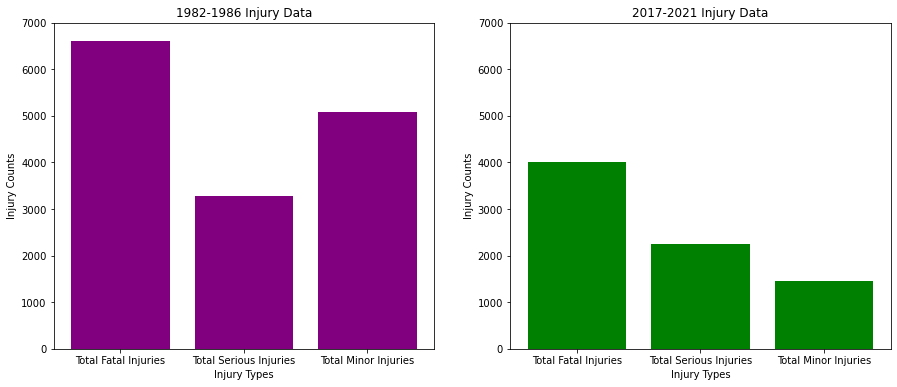

In [42]:
fig, ax = plt.subplots(1, 2, figsize = (15,6))

ax[0].bar(categories, values1, color="purple", label="1982-1986")
ax[0].set_ylim(0,7000)
ax[0].set_xlabel('Injury Types')
ax[0].set_ylabel('Injury Counts')
ax[0].set_title("1982-1986 Injury Data")

ax[1].bar(categories, values2, color="green", label="2017-2021")
ax[1].set_ylim(0,7000)
ax[1].set_xlabel('Injury Types')
ax[1].set_ylabel('Injury Counts')
ax[1].set_title("2017-2021 Injury Data");

In [43]:
damage17 = seventeen['Aircraft.damage'].value_counts()

In [44]:
damage82 = eightytwo['Aircraft.damage'].value_counts()

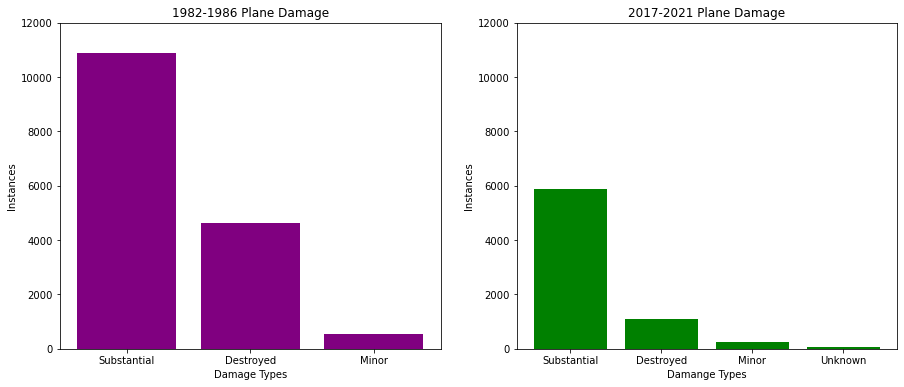

In [45]:
fig, ax = plt.subplots(1, 2, figsize = (15,6))

ax[0].bar(damage82.keys(), damage82.values, color="purple", label="1982-1986")
ax[0].set_ylim(0,12000)
ax[0].set_xlabel('Damage Types')
ax[0].set_ylabel('Instances')
ax[0].set_title("1982-1986 Plane Damage")

ax[1].bar(damage17.keys(), damage17.values, color="green", label="2017-2021")
ax[1].set_ylim(0,12000)
ax[1].set_xlabel('Damange Types')
ax[1].set_ylabel('Instances')
ax[1].set_title("2017-2021 Plane Damage");

# Writing the Aviation Data Frame to a CSV

In [46]:
aviation.to_csv("aviation.csv")

In [48]:
aviation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87951 entries, 0 to 90347
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Event.Id                87951 non-null  object  
 1   Investigation.Type      87951 non-null  object  
 2   Accident.Number         87951 non-null  object  
 3   Event.Date              87951 non-null  object  
 4   Location                87899 non-null  object  
 5   Country                 87729 non-null  object  
 6   Latitude                34212 non-null  object  
 7   Longitude               34203 non-null  object  
 8   Airport.Code            49601 non-null  object  
 9   Airport.Name            52117 non-null  object  
 10  Injury.Severity         86961 non-null  object  
 11  Aircraft.damage         84848 non-null  object  
 12  Aircraft.Category       32181 non-null  object  
 13  Registration.Number     86666 non-null  object  
 14  Make                  